# Intro to Convolutional Neural Networks

So far you have been working with fully connected, or densely connected networks. These networks work well for extremely well-defined problems, like with the MNIST dataset, but it isn't very good at extracting more general information about a picture.

In [110]:
# Import the image library from keras.preprocessing.
from keras.preprocessing import image

# Import the Image and ImageChops library from the pillow library.
from PIL import Image, ImageChops

# Import TensorFlow and Keras to create the neural network.
import tensorflow as tf
from tensorflow import keras


# Import the MNIST dataset and backend as K.
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K


# Import NumPy and Matplotlib libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Testing your Network
Now that you've imported and setup the libraries, you'll test your densely connected network by loading the MNIST data and printing the network's predictions.

## Load the Data


In [111]:
# Load the MNIST Data
def show_min_max(array, i):
    random_image = array[i]
    print(random_image.min(), random_image.max())

In [112]:
# Create a function that will plot a image from the dataset and display the image.
def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.title(" Digit " + str(labels[i]))
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [113]:
# Create a function called predict_image that will print the densely connected network's prediction for the image.
def predict_image(model, x):
  x = x.astype('float32')
  x = x / 255.0

  x = np.expand_dims(x, axis=0)

  image_predict = model.predict(x, verbose=0)
  print("Predicted Label: ", np.argmax(image_predict))

  plt.imshow(np.squeeze(x))
  plt.xticks([])
  plt.yticks([])
  plt.show()
  return image_predict

In [114]:
# Create a function called plot_value_array that will plot the image and predicted value.
def plot_value_array(predictions_array, true_label, h):
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array[0], color="#777777")
  plt.ylim([(-1*h), h])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  plt.show()

In [115]:
# Load the 'my_model.h5'
model = tf.keras.models.load_model('my_model.h5')

## Testing the Network

In [116]:
# Load and preprocess a test image for the network.
path = "invertedTest.jpg"

img = tf.keras.preprocessing.image.load_img(path, target_size=(28,28), color_mode = "grayscale")
x = tf.keras.preprocessing.image.img_to_array(img)

Predicted Label:  5


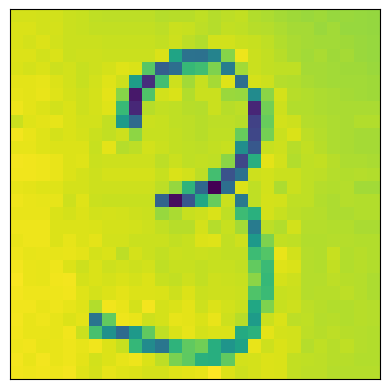

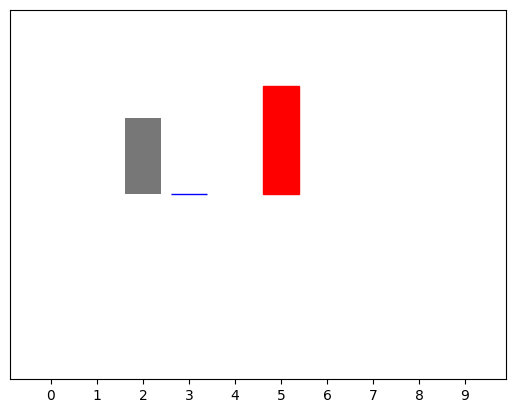

In [117]:
# Run the densely connected network to see its prediction for the image.
true_label = 3
p_arr = predict_image(model, x)
plot_value_array(p_arr, true_label, 1)

Predicted Label:  5


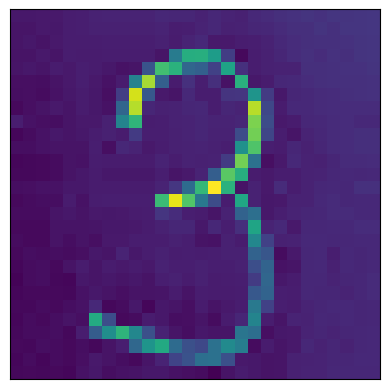

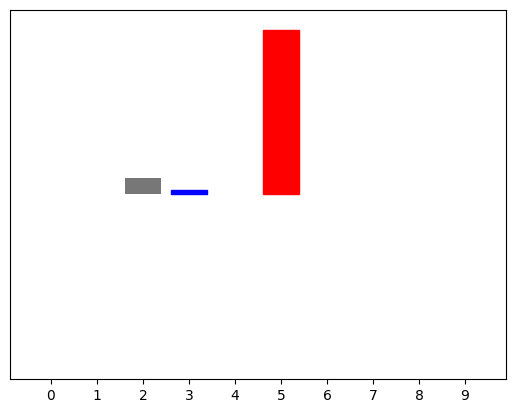

In [118]:
# Re-run the network to see the colors inverted.
x_inv = 255-x
arr = predict_image(model,x_inv)
plot_value_array(arr,3,1)

# Data Preparation and Fixing the Flaws
The network can correctly predict images, but only in a very specific set of parameters. Since all of the training images are white drawings with black backgrounds, when the network tries to guess what an image with a white background is, it has a much harder time making conclusions.

For the next part, you'll invert *some* of the training data so that the network is able to practice on both white backgrounds and black backgrounds.

In [119]:
# Create variables to keep track of the number rows and columns for each image.
img_rows, img_cols = 28, 28

In [120]:
# Create a variable to keep track of the number of output classes.
num_classes = 10

In [121]:
# Load the train and test data, and a backup of each.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(train_images_backup, train_labels_backup), (test_images_backup, test_labels_backup) = mnist.load_data()

In [122]:
# Print the shape to confirm it's the right data.
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [123]:
# Reshape the training and test data by converting the list of pixels into a 28x28 grid.
train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols,1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)

In [124]:
# Create an input_shape variable to keep track of the data's shape.
input_shape = (img_rows, img_cols, 1)

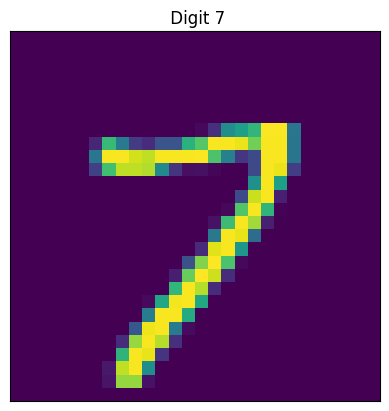

0 255


In [125]:
# Call the plot_image function to print out the 3001 image in train_images.
plot_image(train_images, 30001, train_labels)

# Call the show_min_max function to display the min and max values of the image.
show_min_max(train_images, 30001)

In [126]:
# Invert the training data for the network to practice on white backgrounds and black backgrounds.
train_images[30000:]=255-train_images[30000:]

In [127]:
# Change the image values to between 0 and 1, convert that training and test data into float32.
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [128]:
# Divide the images by 255 to make sure that each pixel is stored as a value between 0 and 1.
train_images /=255
test_images/= 255

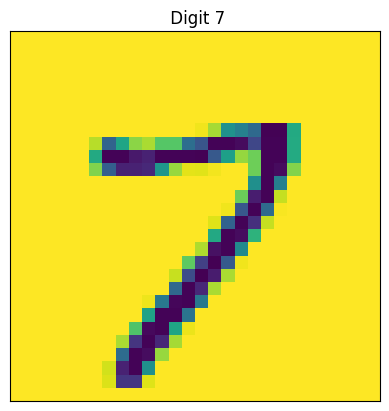

0.0 1.0


In [129]:
# With the adjusted data, call the plot_image function to print out the 3001 image in train_images.
plot_image(train_images, 30001, train_labels)

# With the adjusted data, call the show_min_max function to display the min and max values of the image.
show_min_max(train_images, 30001)

In [130]:
# Employ one-hot encoding on your training labels.
train_labels = keras.utils.to_categorical(train_labels, num_classes)

# Employ one-hot encoding on your test labels.
test_labels = keras.utils.to_categorical(test_labels, num_classes)

# Re-training the Network
Now that you've prepared your data again and fixed the flaws, you'll re-train your network by importing the sequential model and adding the layers.

## Import Model and Layers

In [131]:
# Import the Sequential model.
from tensorflow.keras.models import Sequential

# Import the Dense and Flatten layers.
from tensorflow.keras.layers import Dense, Flatten

In [132]:
# Create a variable called epochs and set the value as 10.
epochs = 10

# Create a new model object called model_inv using the Keras Sequential command.
model_inv = Sequential()

# Add a Flatten layer and pass the input shape as an argument.
model_inv.add(Flatten(input_shape = input_shape))

# Add a Dense layer to your network with the size of the layers in neurons and relu as the activation function.
model_inv.add(Dense(16,activation='relu'))

# Add an output layer.
model_inv.add(Dense(10, activation='softmax'))

# Print a summary of your network so far.
model_inv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 16)                12560     
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 12730 (49.73 KB)
Trainable params: 12730 (49.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile the Network

In [133]:
# Add the compile function that calculates the loss and uses the optimizer parameter to set the optimization algorithm.
model_inv.compile(optimizer = 'adam',loss = tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

## Training

In [134]:
# Add the fit function and set the input data for this model so the network doesn't rely on a pattern to learn.
model_inv.fit(train_images, train_labels, epochs = epochs)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4170 - accuracy: 0.4798
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0833 - accuracy: 0.5697
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0234 - accuracy: 0.5819
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9960 - accuracy: 0.5900
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9787 - accuracy: 0.5990
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8979 - accuracy: 0.6383
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8071 - accuracy: 0.6769
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7703 - accuracy: 0.6940
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7463 - accuracy: 0.7063
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.712

## Analyzing the Output

In [135]:
# Calculate the loss and accuracy of your model.
test_loss, test_acc = model_inv.evaluate(test_images, test_labels, verbose=2)

# Print out the test accuracy.
print('\nTest accuracy: ', test_acc)

313/313 - 1s - loss: 0.2060 - accuracy: 0.9423 - 670ms/epoch - 2ms/step

Test accuracy:  0.942300021648407


# Testing your Network
With your network trained, you'll test the network and print a graph and a list with the predicted ranges.

Predicted Label:  4


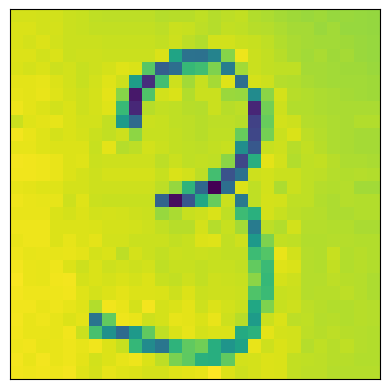

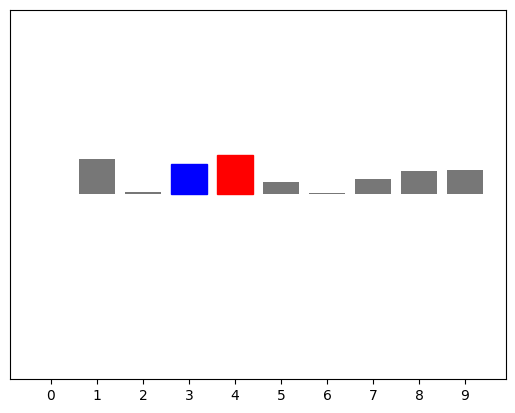

[[0.00251876 0.19161563 0.01381118 0.16591553 0.2122346  0.06492408
  0.00780484 0.08188597 0.12645507 0.13283435]]


In [138]:
# Create a variable called arr to hold the network's predicted value.
arr = predict_image(model_inv,x)

# Plot the predicted values to a graph.
plot_value_array(arr,3,1)

# Print the list with the predicted values.
print(arr)

# Exporting your Model
Finally, you'll export your model and save it.


In [139]:
# Export your model.
model_inv.save('my_model_inv.h5')

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
